# In Class: ggplot II

## Loading packages and data

In this session we will continue our analysis of COVID-19 data in the US, but this time look more locally at individual case data from Montgomery county in Pennsylvania (Data which one of your course directors may or may not have been obsessively analyzing since March 2020).

We will look at the number of cases across townships, the age distribution of these cases and how outcomes are associated with age.

Unlike the previous session, where we used mostly geoms with 'identity' stats (e.g. geom_point), here we will use functions that calculate different stats from the data including counts, bins and density.

We have already downloaded the data for you. As before, load the data using the code below and take a look at it so you can get an idea of how it is structured.



In [114]:
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=3) #set size for plots in this notebook
data <- as_tibble(read.csv('data.csv'))
head(data)

OBJECTID,Age,Gender,DateReported,Name,Municipal_Number,Age_Range,Hospitalized,Deaths,Race___Deaths_Only_,Death_Announced,Last_Updated,Positive,Update_Last_7,Update_Last_14,Update_Last_28
<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,56,M,2020-03-07,Worcester,67,50-59,No,0,,,2021/02/19 05:00:00+00,1,,,
2,54,F,2020-03-07,Lower Gwynedd,39,50-59,No,0,,,2021/02/19 05:00:00+00,1,,,
3,69,M,2020-03-08,Lower Merion,40,60-69,No,0,,,2021/02/19 05:00:00+00,1,,,
4,69,F,2020-03-08,Lower Merion,40,60-69,No,0,,,2021/02/19 05:00:00+00,1,,,
5,67,M,2020-03-09,Telford,22,60-69,Yes,0,,,2021/02/19 05:00:00+00,1,,,
6,62,F,2020-03-09,Upper Merion,58,60-69,No,0,,,2021/02/19 05:00:00+00,1,,,


As before, run the code below to convert the column DateReported to Class "Date".

In [115]:
data$DateReported = as.Date(data$DateReported,format = '%Y-%m-%d')

In this dataset every line is a single confirmed COVID-19 case. First thing we would like to do is plot the number of cases in the county as a function of time. In the last in_class session we had the total number cases reportd each day as a variable, so it was very intutive to plot that number over the date using geom_point.

Here, we would need to summarize the number of rows reported each day. You have already done this two classes ago! (Hint: you would like to make a bar plot)

**Q1** Write the ggplot code to produce a barplot of the number of cases reported per day.

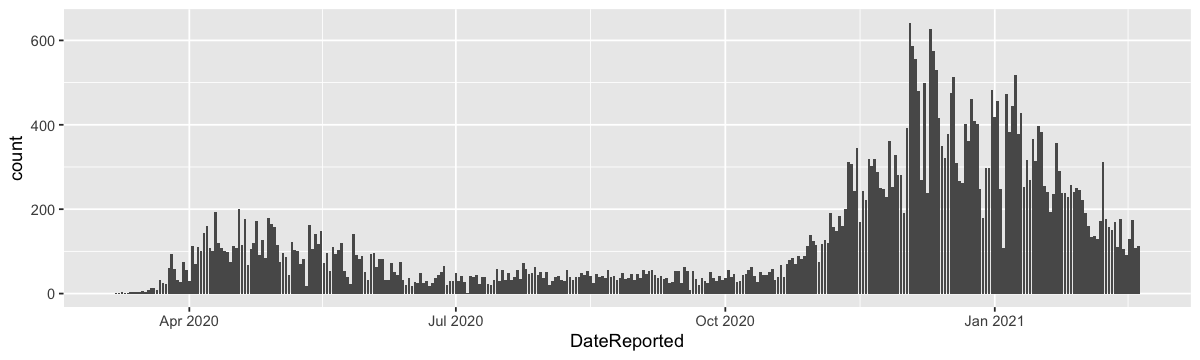

In [116]:
ggplot(data) + geom_bar(aes(x=DateReported))

**Q2** What is the stat that is being used in this plot? *(Hint: check the documentation for geom_bar)*

count

Next we would like to investigate how many cases have been reported in each township (indicated in the coloumn Name). To do that, we will produce a new table (count_data) with two columns: the column "Name" will contain the name of each township and the column "n" will contain the number of cases (which is the number of rows reported by each township).

**Q3** Use dyplr's group_by and summarise to make this new table (count_data). If you cannot remember how to use these, take a look at RIII. There you used summarise with the function first, but this time you will use summarise with another parameter to count the number of rows. Look at the summarise manual page if needed. After you make count_data, look at the head to check that it looks as expected.

In [131]:
count_data <- data %>% group_by(Name) %>% summarise(n = n())
head(count_data)

Name,n
<chr>,<int>
Abington,3187
Ambler,426
Bridgeport,253
Bryn Athyn,36
Cheltenham,1943
Collegeville,224


Before moving forward, let's add another piece of data. It would be interesting to compare the number of confirmed cases with the population size in each township and calculate the percent of population that had a confirmed infection. For that we will need to add another column to count_data with the population size for each township and another coloumn with the ratio of these numbers.

Use the code below to load a table with population size.

In [132]:
pop_size <- as_tibble(read.csv('montco_2010_census.csv'))
head(pop_size)

(This data is from the 2010 census, but not much happens in the suburbs....)

Now you will have to join the two tables and add another column (pct_infected) with the ratio. 

**Q4** We have provided some of this code, add the missing part to calculate the ratio.

In [133]:
count_data <- count_data %>% inner_join(pop_size) %>% mutate(pct_infected = 100*(n/total_n))
head(count_data)

Joining, by = "Name"



Name,n,total_n,prec_infected
<chr>,<int>,<int>,<dbl>
Abington,3187,55310,5.762068
Ambler,426,6417,6.638616
Bridgeport,253,4554,5.555556
Bryn Athyn,36,1375,2.618182
Cheltenham,1943,36793,5.280896
Collegeville,224,5089,4.401651


(Note the variable that was used to join the two tables. This time it was easy because both tables had a single shared variable, but in other cases you might need to specify which variable to use for the join)

First let's compare the size of each township with the percent of confirmed infections.

**Q5** Produce a dot plot to compare these two variables. Is there a clear relationship?

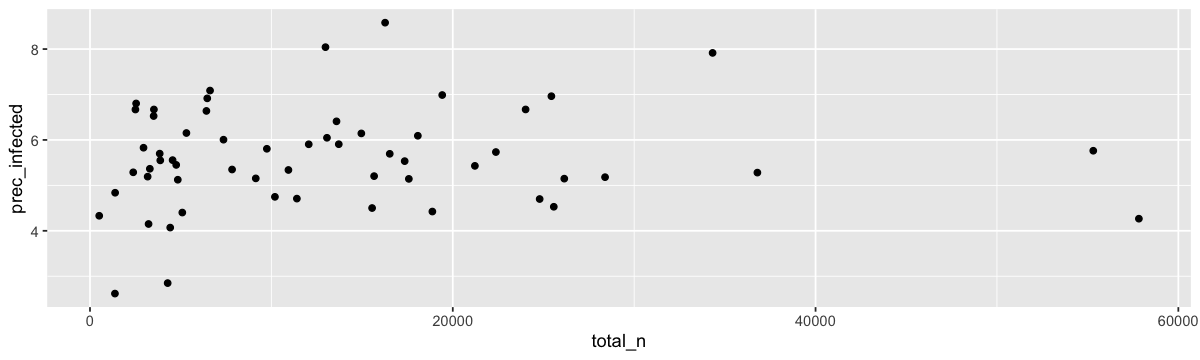

In [134]:
ggplot(count_data,aes(x=total_n,prec_infected)) + geom_point()

Now let's choose the top four townships with the highest **number** of infections for further analysis. Use the code below to sort count_data by the total number of confirmed infections.

In [137]:
count_data <- count_data %>% arrange(n)
head(count_data)

Name,n,total_n,prec_infected
<chr>,<int>,<int>,<dbl>
Green Lane,22,508,4.330709
Bryn Athyn,36,1375,2.618182
Schwenksville,67,1385,4.837545
Narberth,122,4282,2.849136
Red Hill,126,2383,5.287453
North Wales,134,3229,4.149892


ooops... the code sorted the column n by an ascending order.

**Q6** Modify the code such that the order would be reversed (you might need to google the command arrange to do that)

In [138]:
count_data <- count_data %>% arrange(desc(n))
head(count_data)

Name,n,total_n,prec_infected
<chr>,<int>,<int>,<dbl>
Abington,3187,55310,5.762068
Norristown,2717,34324,7.915744
Lower Merion,2467,57825,4.266321
Cheltenham,1943,36793,5.280896
Lower Providence,1771,25436,6.962573
Upper Moreland,1602,24015,6.670831


Great! Now that we know which four townships have the highest number of infections, we will focus on them for addtional analysis.

**Q7**
Replot the plot from Q1 for these four townships such that each will have a seperate plot, you will have to:

(1) Filter the data to have only these four townships.

(2) Make a ggplot and use facet_wrap to plot the data for the four townships separatly.

(Remember that you can use %>% to input data directly into ggplot, try to write this in one command without saving any addtional variables.)

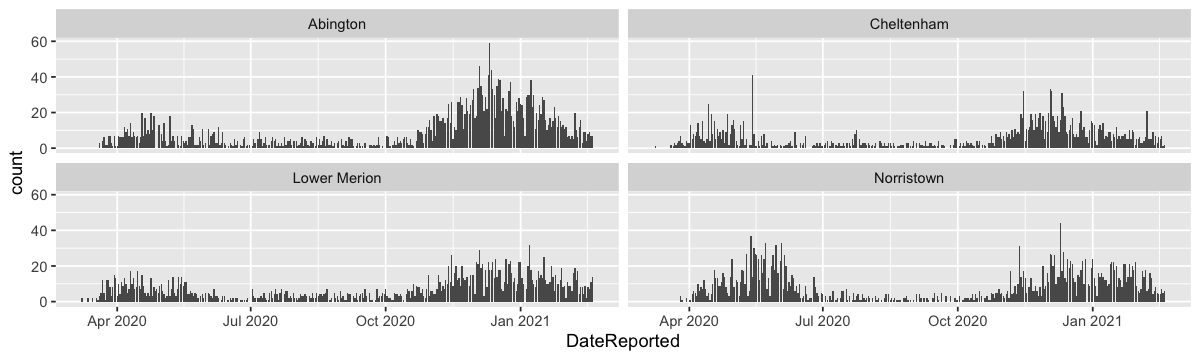

In [139]:
data %>% filter(Name %in% c("Abington","Norristown","Lower Merion","Cheltenham")) %>%
ggplot(aes(x=DateReported)) + geom_bar() + facet_wrap(~Name,ncol=2)

Each bar in our plot contains all the cases reported on that specific day, we can easily add information to these bars by dividing them according to an addtional categorical variable. For example, say we would like to know which age groups the cases reported on each day belong to. 

**Q8** Use the code above and add one more aesthetic mapping by using the paramater "fill" and assigning the variable Age_Range to it.

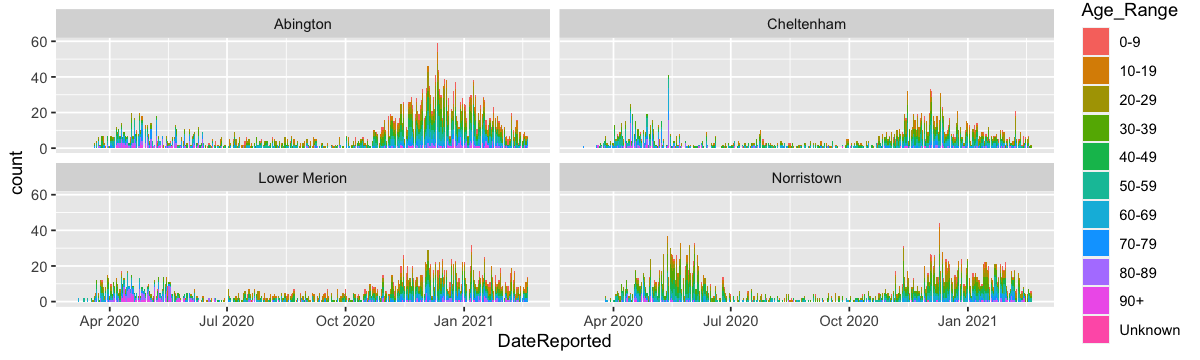

In [140]:
data %>% filter(Name %in% c("Abington","Norristown","Lower Merion","Cheltenham")) %>%
ggplot(aes(x=DateReported,fill=Age_Range)) + geom_bar() + facet_wrap(~Name,ncol=2)

**Q9** Try to take a close look, do you see a difference in age composition between the first and second wave in Lower Merion?

Last, we all know that there is a strong relationship between age and outcome of Sars-CoV2 infection, let's check if this is reflected in the data. In the original dataset from montoco (data) there is a column called "Hospitalized" which contains some outcome data. 

Use the code below to make a density plot of the age distribution for the different outcomes.

Warning message:
“Removed 9 rows containing non-finite values (stat_density).”


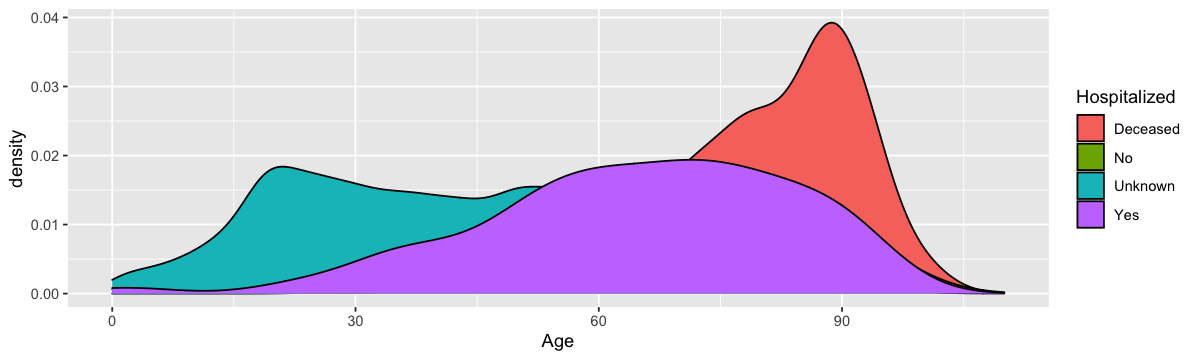

In [141]:
ggplot(data) + geom_density(aes(x=Age,fill=Hospitalized))

This is nice but it is a bit hard to see the distribution of cases that were not hospitalized, we can add a parameter to the geom which will make the fill semi-transparent (use google). 

**Q10** Add this to the code from the plot above and plot it here.

Warning message:
“Removed 9 rows containing non-finite values (stat_density).”


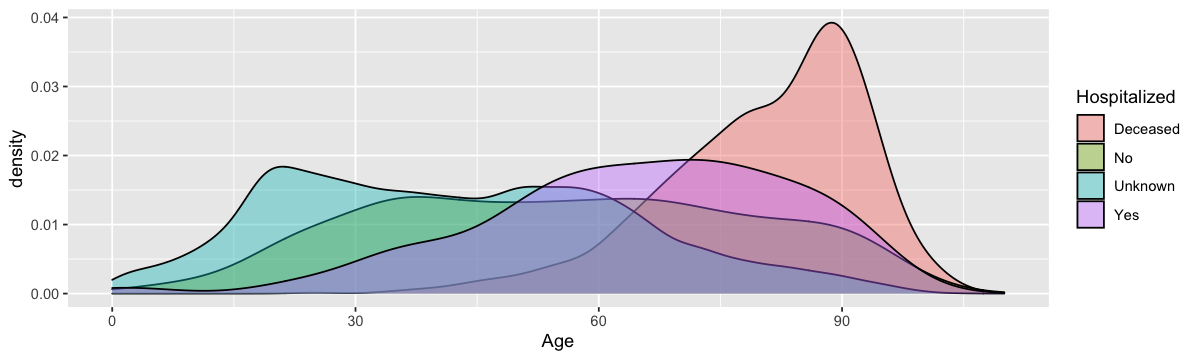

In [142]:
ggplot(data) + geom_density(aes(x=Age,fill=Hospitalized),alpha=0.4)

# Homework

For the last part we will look at the rate of vaccination acccross different US states.

Load the data from the file 'us-daily-covid-vaccine-doses-administered.csv', it contains the number of reported shots per day for each US state. Start by plotting the number of shots per day over time for your four favorite states. 

Do a back-of-the-envelope calculation, assuming a the current rate (say mean rate of the last 7 days) at what point will these staes reach herd immunity (~75%)?
